In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df_new = pd.read_csv("train.csv")

In [3]:

df_new = df_new[~(df_new["Delivery_location_latitude"] == 0)]\
    .reset_index(drop=True).copy()
df_new

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [4]:

df_new = df_new[~(df_new["Restaurant_latitude"] < 7.00)]\
    .reset_index(drop=True).copy()
df_new



,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41517,0x1178,RANCHIRES16DEL01,35,4.2,23.371292,85.327872,23.481292,85.437872,08-03-2022,21:45:00,21:55:00,conditions Windy,Jam,2,Drinks,motorcycle,1,No,Metropolitian,(min) 33
41518,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
41519,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
41520,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


### Tính khoảng cách đường bộ từ các cặp tọa độ bằng thư viện OSRM. Sau đó thêm cột distance vào data

In [5]:
# import requests
# import pandas as pd

# def calculate_distance_osrm(origin_lat, origin_lon, dest_lat, dest_lon):
#     # Định dạng URL của OSRM API
#     origin = f"{origin_lon},{origin_lat}"
#     destination = f"{dest_lon},{dest_lat}"
#     url = f"http://router.project-osrm.org/route/v1/driving/{origin};{destination}?overview=false"
    
#     # Gửi yêu cầu đến OSRM API
#     response = requests.get(url)
    
#     # Phân tích kết quả JSON
#     data = response.json()
    
#     # Kiểm tra xem kết quả có chứa khóa 'routes' hay không
#     if 'routes' in data and len(data['routes']) > 0:
#         # Trích xuất khoảng cách từ kết quả
#         distance = data['routes'][0]['distance']  # Khoảng cách tính bằng mét
#         # Chuyển đổi khoảng cách từ mét sang kilômét
#         distance_in_km = distance / 1000
#         return distance_in_km
#     else:
#         # Trường hợp không tìm thấy tuyến đường, trả về giá trị mặc định là -1
#         return -1  

# #df = pd.read_csv('train.csv')

# # Tạo một cột mới để lưu khoảng cách
# df_train['distance_km'] = 0.0

# # Sử dụng vòng for để tính khoảng cách cho từng hàng
# for index, row in df_train.iterrows():
#     restaurant_latitude = row['Restaurant_latitude']
#     restaurant_longitude = row['Restaurant_longitude']
#     delivery_latitude = row['Delivery_location_latitude']
#     delivery_longitude = row['Delivery_location_longitude']
    
#     # Tính khoảng cách và gán vào cột mới
#     distance = calculate_distance_osrm(restaurant_latitude, restaurant_longitude, delivery_latitude, delivery_longitude)
#     df_train.at[index, 'distance_km'] = distance

# # Lưu DataFrame đã cập nhật vào file CSV gốc
# df_train.to_csv('12300_dong.csv', index=False)
# df_train.head(5)


In [6]:
df_new=pd.read_csv('12300_dong.csv')
df_new

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,5.1959
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,28.9722
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,5.1475
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,13.1790
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,10.5799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,0x1204,JAPRES06DEL03,26,4.7,26.911927,75.797282,27.001927,75.887282,12/3/2022,23:50:00,0:00:00,conditions Fog,Low,0,Snack,motorcycle,1,No,Urban,(min) 20,19.5478
11159,0xb954,HYDRES12DEL01,34,4.7,17.429585,78.392621,17.499585,78.462621,14-03-2022,17:45:00,17:55:00,conditions Windy,Medium,1,Snack,scooter,1,No,Metropolitian,(min) 22,21.9109
11160,0xd538,GOARES15DEL01,23,5,15.513150,73.783460,15.623150,73.893460,16-02-2022,18:50:00,19:00:00,conditions Windy,Medium,2,Drinks,electric_scooter,1,No,Metropolitian,(min) 21,24.8817
11161,0x940,SURRES02DEL02,50,6,21.186608,72.794136,21.206608,72.814136,1/3/2022,NaN,11:25:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 22,3.4398


In [7]:
# Xóa dòng thứ 3 từ DataFrame df_new và lưu đè vào cùng DataFrame
df_new.drop(1, inplace=True)
# df_new.drop(14, inplace=True)
df_new.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,5.1959
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,5.1475
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,13.1790
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,10.5799
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11/3/2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26,10.0741


In [8]:
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df_new)

In [9]:
df_new.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        385
Delivery_person_Age            376
Time_Orderd                    346
City                           304
multiple_deliveries            242
Weatherconditions              116
Road_traffic_density           112
Festival                        46
ID                               0
Vehicle_condition                0
Time_taken(min)                  0
Type_of_vehicle                  0
Type_of_order                    0
Time_Order_picked                0
Delivery_person_ID               0
Order_Date                       0
Delivery_location_longitude      0
Delivery_location_latitude       0
Restaurant_longitude             0
Restaurant_latitude              0
distance_km                      0
dtype: int64

## Tiền Xử Lý

- Xóa cột DL k dùng đến

In [10]:
def drop_columns(df):
    df.drop(['ID', 'Delivery_person_ID'],axis=1,inplace=True)
    
print("Before No. of columns: ",df_new.shape[1])
drop_columns(df_new)
print("After No. of columns: ",df_new.shape[1])

Before No. of columns:  21
After No. of columns:  19


### Chỉnh đúng định dạng

In [11]:
def update_column_name(df):
    #Đổi tên cột Weatherconditions
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    
update_column_name(df_new)
print(df_new.columns)

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'distance_km'],
      dtype='object')


- Chuyển đổi đúng kiểu DL

In [12]:
def update_datatype(df):
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')

    def parse_date(date_str):
        for fmt in ("%d-%m-%Y", "%m/%d/%Y"):
            try:
                return pd.to_datetime(date_str, format=fmt)
            except ValueError:
                continue
        return pd.to_datetime(date_str)  

    df['Order_Date'] = df['Order_Date'].apply(parse_date)

update_datatype(df_new)


In [13]:
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24,5.1959
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26,5.1475
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21,13.1790
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30,10.5799
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,2022-11-03,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,(min) 26,10.0741


- Loại DL dư thừa ở các cột

In [14]:

def extract_column_value(df):
    #Chỉnh sửa cột Time và chuyển dữ liệu thành loại int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    # chia thành 2 phần = khoảng trắng, sau đó chỉ lấy phần thứ 2 (số phút), rồi chuyển số phút -> int
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip() if isinstance(x, str) else x)

extract_column_value(df_new)
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,5.1959
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30:00,8:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,5.1475
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,13.1790
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,10.5799
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,2022-11-03,21:20:00,21:30:00,Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,26,10.0741


- Chuyển date sang thành từng nhánh nhỏ

In [15]:
#Chuyển date sang DL nhỏ
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    #Ngày thứ 5 và thứ 6 trong tuần là thứ sáu và thứ bảy
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_new)
df_new

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30:00,8:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,2022-11-03,21:20:00,21:30:00,Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,26,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,26.0,4.7,26.911927,75.797282,27.001927,75.887282,2022-12-03,23:50:00,0:00:00,Fog,Low,0,Snack,motorcycle,1.0,No,Urban,20,19.5478,3,12,4,2022,5,0,0,0,0,0,0,1
11159,34.0,4.7,17.429585,78.392621,17.499585,78.462621,2022-03-14,17:45:00,17:55:00,Windy,Medium,1,Snack,scooter,1.0,No,Metropolitian,22,21.9109,14,3,1,2022,0,0,0,0,0,0,0,0
11160,23.0,5.0,15.513150,73.783460,15.623150,73.893460,2022-02-16,18:50:00,19:00:00,Windy,Medium,2,Drinks,electric_scooter,1.0,No,Metropolitian,21,24.8817,16,2,1,2022,2,0,0,0,0,0,0,0
11161,50.0,6.0,21.186608,72.794136,21.206608,72.814136,2022-01-03,NaN,11:25:00,NaN,NaN,3,Meal,scooter,1.0,No,Urban,22,3.4398,3,1,1,2022,0,0,0,0,0,0,0,0


In [16]:
df_new.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        385
Delivery_person_Age            376
Time_Orderd                    346
City                           304
multiple_deliveries            242
Weather_conditions             116
Road_traffic_density           112
Festival                        46
Time_Order_picked                0
month                            0
is_year_end                      0
is_year_start                    0
is_quarter_end                   0
is_quarter_start                 0
is_month_end                     0
is_month_start                   0
day_of_week                      0
year                             0
quarter                          0
day                              0
Order_Date                       0
distance_km                      0
Time_taken(min)                  0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Type_of_vehicle                  0
Type_of_order                    0
Vehicle_condition   

### Weather Conditions

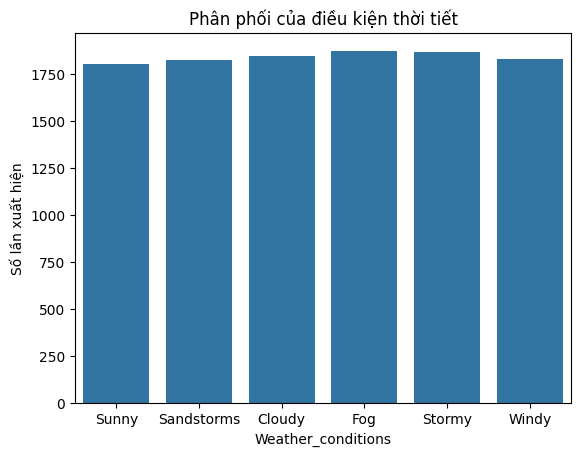

In [17]:
# Vẽ biểu đồ countplot cho cột Weather_conditions
sns.countplot(x='Weather_conditions', data=df_new)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Phân phối của điều kiện thời tiết')
plt.xlabel('Weather_conditions')
plt.ylabel('Số lần xuất hiện')

# Hiển thị biểu đồ
plt.show()

In [18]:
#C1: mode
def handle_null_values(df):
    df['Weather_conditions'].fillna(df['Weather_conditions'].mode()[0], inplace=True)

handle_null_values(df_new)


In [19]:
# #C2: random
# def handle_null_values(df):
   
#     df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)

# handle_null_values(df_new)


### Age

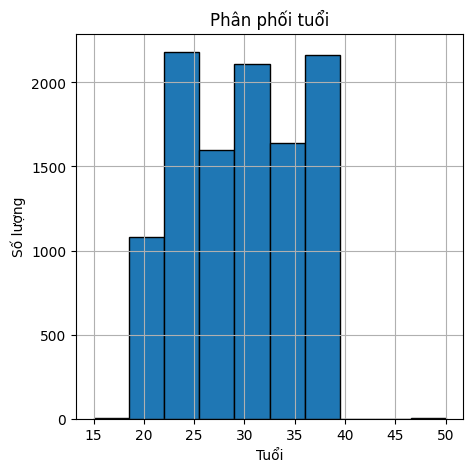

In [20]:
# Vẽ biểu đồ histogram
plt.figure(figsize=(5, 5))
plt.hist(df_new['Delivery_person_Age'], bins=10, edgecolor='black')
plt.title('Phân phối tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

In [21]:
# def remove_outliers(df, column_name):
#     # Tính toán các ngưỡng dựa trên IQR
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Lọc dữ liệu để giữ lại các giá trị nằm trong các ngưỡng (loại bỏ ngoại lai)
#     filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
#     return filtered_df

# # Giả sử bạn có DataFrame `df_new` và bạn muốn xóa giá trị ngoại lai cho cột `Delivery_person_Age`
# df_new = remove_outliers(df_new, 'Delivery_person_Age')


In [22]:

# from sklearn.impute import SimpleImputer

# # Lọc các giá trị trong khoảng từ 2 đến dưới 5
# df_new = df_new[(df_new['Delivery_person_Age'] >= 18)]


# # Sử dụng SimpleImputer để thay thế các giá trị thiếu bằng giá trị trung bình
# imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
# df_new['Delivery_person_Age'] = imputer.fit_transform(df_new[['Delivery_person_Age']])


In [23]:
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values=np.nan, strategy="mean")

#imputer.fit(X['Delivery_person_Age'])
df_new['Delivery_person_Age'] = imputer.fit_transform(df_new[['Delivery_person_Age']])


### Xử lý DL thiếu cột Time_orderd bằng cách tạo thêm cột
- Order_prepare_time = Time_Order_picked - Time_Orderd
- Sau đó thay các giá trị NULL = mean


In [24]:
def calculate_time_diff(df):
    # Chuyển đổi các cột thời gian thành định dạng datetime
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    # Tính toán thời gian đặt hàng và thời gian lấy hàng
    df['Time_Order_picked_formatted'] = df['Order_Date'] + np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['Time_Order_picked']
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    
    # Chuyển đổi các cột thành kiểu datetime nếu chúng không phải là kiểu datetime
    df['Time_Order_picked_formatted'] = pd.to_datetime(df['Time_Order_picked_formatted'])
    df['Time_Ordered_formatted'] = pd.to_datetime(df['Time_Ordered_formatted'])
    
    # Tính toán thời gian chuẩn bị đơn hàng
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Xử lý giá trị null bằng 
    df['order_prepare_time'].fillna(df['order_prepare_time'].mean(), inplace=True)

    # Bỏ tất cả các cột liên quan đến ngày và giờ
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Order_Date'], axis=1, inplace=True)

calculate_time_diff(df_new)
df_new.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_Order_picked_formatted,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,2022-03-19 11:45:00,15.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,2022-03-19 08:45:00,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,2022-05-04 18:10:00,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,2022-03-26 13:45:00,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,26,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,2022-11-03 21:30:00,10.0


In [25]:
df_new.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        385
City                           304
multiple_deliveries            242
Road_traffic_density           112
Festival                        46
Delivery_person_Age              0
is_month_end                     0
day_of_week                      0
is_month_start                   0
is_quarter_start                 0
quarter                          0
is_quarter_end                   0
is_year_start                    0
is_year_end                      0
is_weekend                       0
Time_Order_picked_formatted      0
year                             0
distance_km                      0
month                            0
day                              0
Time_taken(min)                  0
Type_of_vehicle                  0
Type_of_order                    0
Vehicle_condition                0
Weather_conditions               0
Delivery_location_longitude      0
Delivery_location_latitude       0
Restaurant_longitude             0
Restaurant_latitude 

### Road Traffic

<Axes: xlabel='City', ylabel='count'>

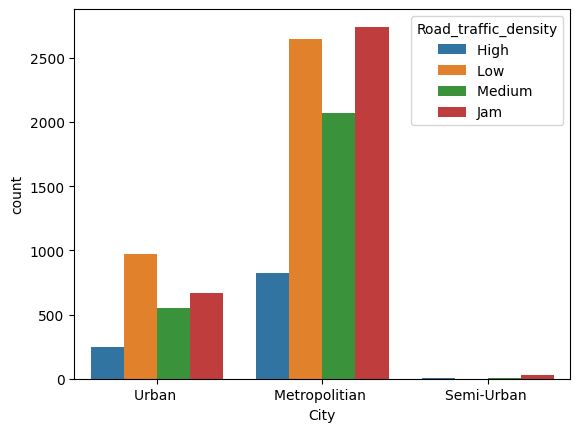

In [26]:
sns.countplot(x=df_new.City,hue=df_new.Road_traffic_density)
#sự tắc nghẽn giao thông


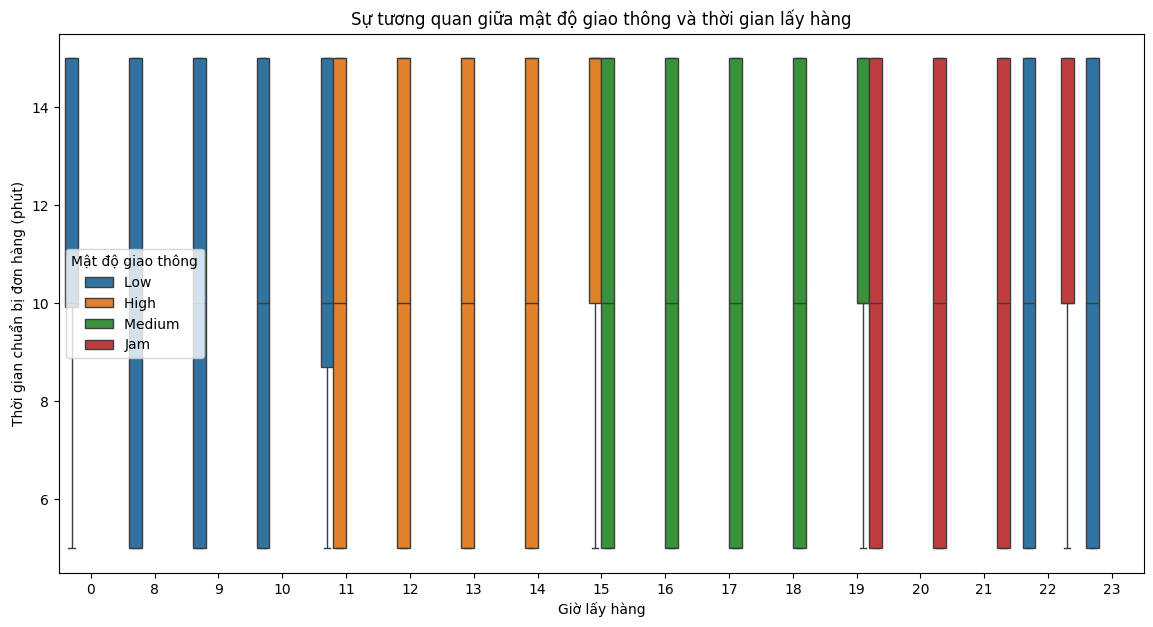

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển đổi Time_Order_picked_formatted sang giờ trong ngày để dễ vẽ biểu đồ
df_new['Hour_Picked'] = df_new['Time_Order_picked_formatted'].dt.hour

# Vẽ biểu đồ phân phối mật độ giao thông theo giờ trong ngày
plt.figure(figsize=(14, 7))
sns.boxplot(x='Hour_Picked', y='order_prepare_time', hue='Road_traffic_density', data=df_new)
plt.title('Sự tương quan giữa mật độ giao thông và thời gian lấy hàng')
plt.xlabel('Giờ lấy hàng')
plt.ylabel('Thời gian chuẩn bị đơn hàng (phút)')
plt.legend(title='Mật độ giao thông')
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Chuẩn bị dữ liệu cho mô hình
# Loại bỏ các hàng có giá trị NULL ở Road_traffic_density để huấn luyện mô hình
df_train = df_new.dropna(subset=['Road_traffic_density'])

# Chọn các tính năng (features) và nhãn (label)
X = df_train[['Hour_Picked', 'order_prepare_time']]
y = df_train['Road_traffic_density']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       High        0.84      0.92      0.88       224
        Jam        0.91      0.91      0.91       711
        Low        0.92      0.95      0.93       752
     Medium        0.96      0.87      0.92       523

    accuracy                           0.91      2210
   macro avg       0.91      0.91      0.91      2210
weighted avg       0.92      0.91      0.91      2210



In [29]:
# Dự đoán mật độ giao thông cho các giá trị NULL
df_null = df_new[df_new['Road_traffic_density'].isna()]
df_null['Road_traffic_density'] = model.predict(df_null[['Hour_Picked', 'order_prepare_time']])

# Thay thế các giá trị NULL trong df_new bằng giá trị dự đoán
df_new.loc[df_new['Road_traffic_density'].isna(), 'Road_traffic_density'] = df_null['Road_traffic_density']

# Kiểm tra lại dữ liệu sau khi thay thế
print(df_new['Road_traffic_density'].isna().sum())


0


In [30]:
df_new.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        385
City                           304
multiple_deliveries            242
Festival                        46
Delivery_person_Age              0
is_month_end                     0
day_of_week                      0
is_month_start                   0
is_quarter_start                 0
quarter                          0
is_quarter_end                   0
is_year_start                    0
is_year_end                      0
is_weekend                       0
Time_Order_picked_formatted      0
order_prepare_time               0
year                             0
distance_km                      0
month                            0
day                              0
Time_taken(min)                  0
Type_of_vehicle                  0
Type_of_order                    0
Vehicle_condition                0
Road_traffic_density             0
Weather_conditions               0
Delivery_location_longitude      0
Delivery_location_latitude       0
Restaurant_longitude

### Rating

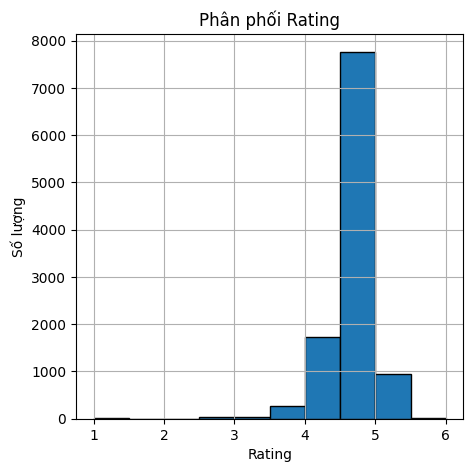

In [31]:
# Vẽ biểu đồ histogram
plt.figure(figsize=(5, 5))
plt.hist(df_new['Delivery_person_Ratings'], bins=10, edgecolor='black')
plt.title('Phân phối Rating')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()


In [32]:
# #C1
# from scipy.stats.mstats import winsorize

# def winsorize_column(df, column_name, limits):
#     df[column_name] = winsorize(df[column_name], limits=limits)
#     return df

# # Winsorize giá trị ngoại lai cho cột `Delivery_person_Ratings`
# df_new = winsorize_column(df_new, 'Delivery_person_Ratings', limits=[0.05, 0.05])


In [33]:
from sklearn.impute import SimpleImputer

df_new = df_new[(df_new['Delivery_person_Ratings'] >= 2) & (df_new['Delivery_person_Ratings'] < 5)]

# Sử dụng SimpleImputer để thay thế các giá trị thiếu bằng giá trị trung bình
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df_new['Delivery_person_Ratings'] = imputer.fit_transform(df_new[['Delivery_person_Ratings']])


In [34]:
df_new.isnull().sum().sort_values(ascending=False)

City                           262
multiple_deliveries            211
Festival                        36
Delivery_person_Age              0
is_month_end                     0
year                             0
day_of_week                      0
is_month_start                   0
is_quarter_start                 0
month                            0
is_quarter_end                   0
is_year_start                    0
is_year_end                      0
is_weekend                       0
Time_Order_picked_formatted      0
order_prepare_time               0
quarter                          0
distance_km                      0
day                              0
Delivery_person_Ratings          0
Time_taken(min)                  0
Type_of_vehicle                  0
Type_of_order                    0
Vehicle_condition                0
Road_traffic_density             0
Weather_conditions               0
Delivery_location_longitude      0
Delivery_location_latitude       0
Restaurant_longitude

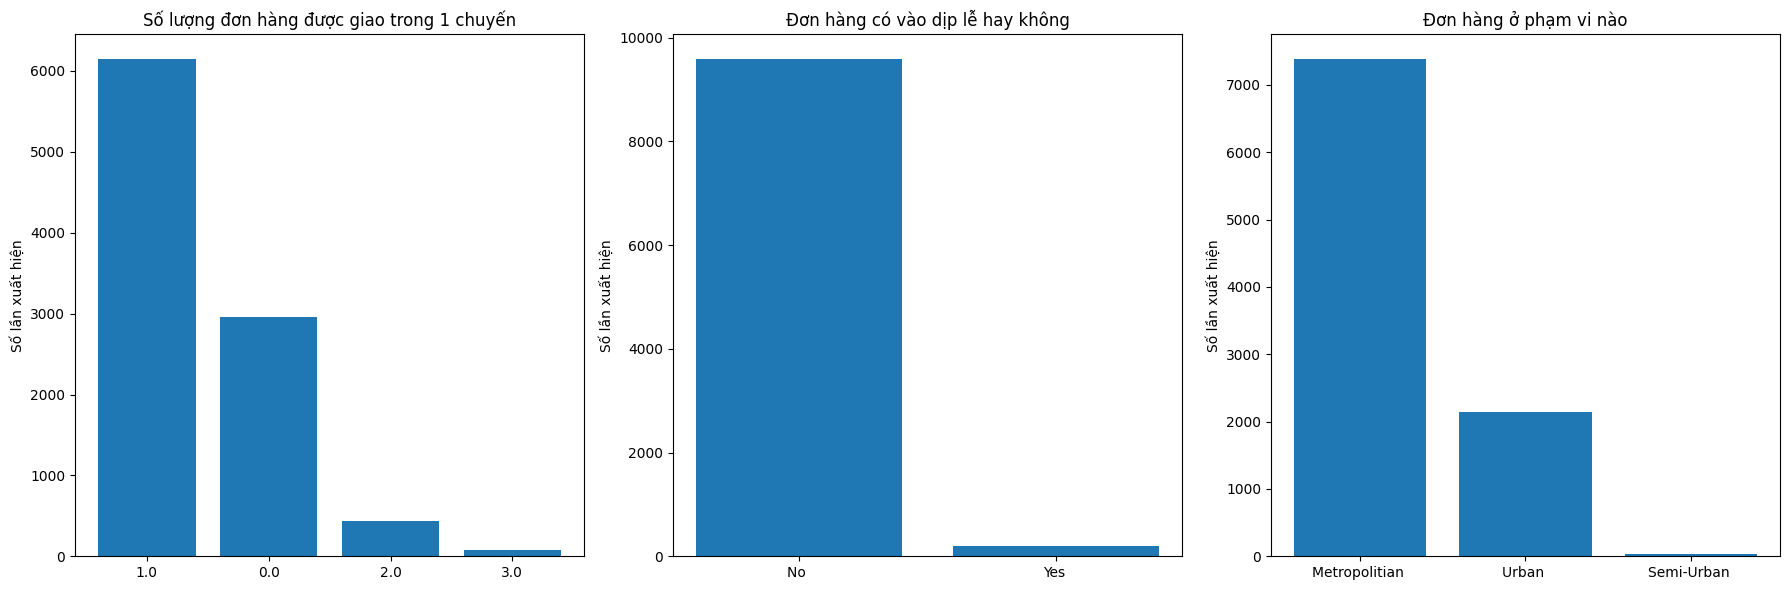

In [35]:
import matplotlib.pyplot as plt

multiple_deliveries = df_new['multiple_deliveries'].value_counts()
festival_count = df_new['Festival'].value_counts()
City_count = df_new['City'].value_counts()

# Tạo hình và các trục con
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ 1: Số lượng đơn hàng được giao trong 1 chuyến
ax1.bar(multiple_deliveries.index.astype(str), multiple_deliveries.values)
ax1.set_title('Số lượng đơn hàng được giao trong 1 chuyến')
ax1.set_ylabel('Số lần xuất hiện')

# Biểu đồ 2: Đơn hàng ở phạm vi nào
ax3.bar(City_count.index.astype(str), City_count.values)
ax3.set_title('Đơn hàng ở phạm vi nào')
ax3.set_ylabel('Số lần xuất hiện')

# Biểu đồ 3: Đơn hàng có vào dịp lễ hay không
ax2.bar(festival_count.index.astype(str), festival_count.values)
ax2.set_title('Đơn hàng có vào dịp lễ hay không')
ax2.set_ylabel('Số lần xuất hiện')



# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


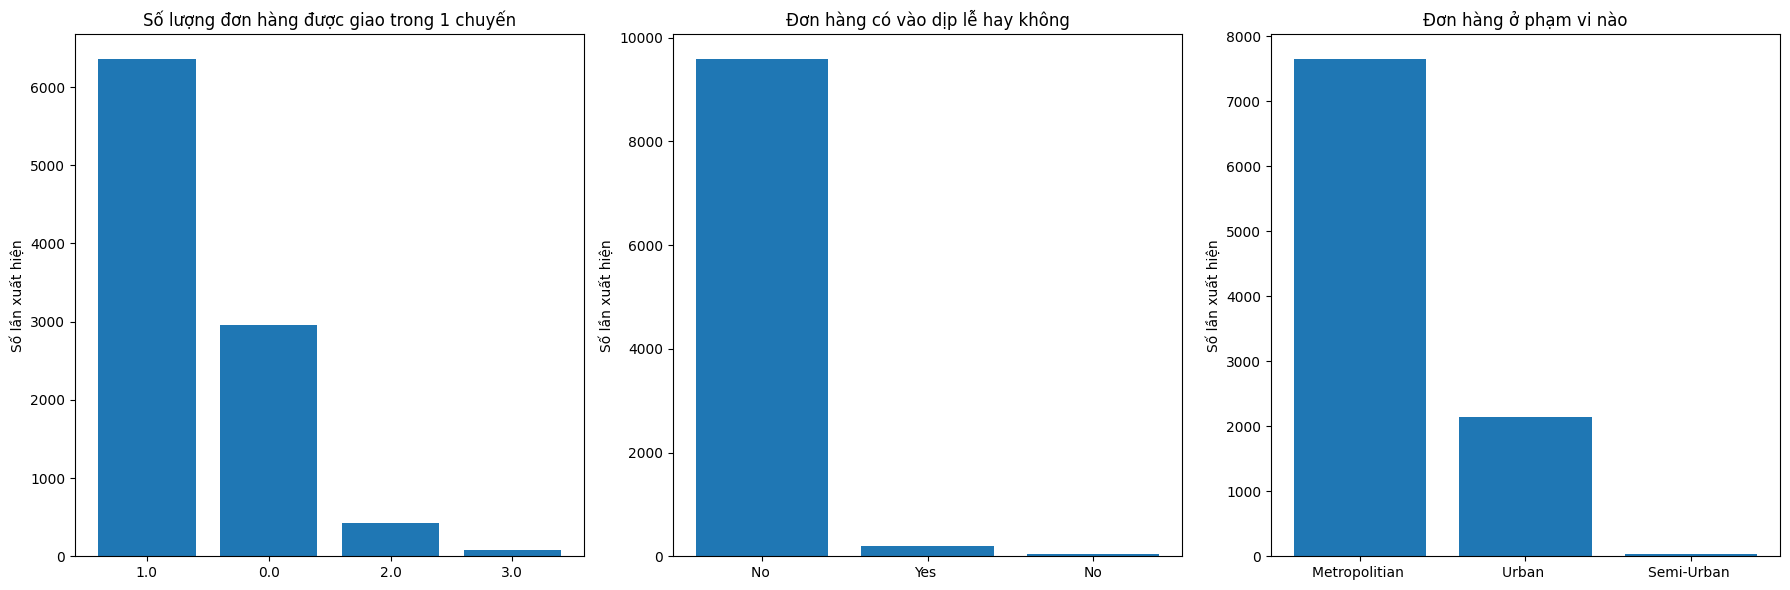

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file được tải lên (giả sử file là CSV và đang ở đường dẫn '/mnt/data/data.csv')

# Xử lý giá trị NULL cho từng cột
df_new['multiple_deliveries'].fillna(df_new['multiple_deliveries'].mode()[0], inplace=True)

df_new['City'].fillna(df_new['City'].mode()[0], inplace=True)

df_new['Festival'].fillna('No', inplace=True)



# Tính toán số lượng của mỗi loại
multiple_deliveries = df_new['multiple_deliveries'].value_counts()
festival_count = df_new['Festival'].value_counts()
City_count = df_new['City'].value_counts()

# Tạo hình và các trục con
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ 1: Số lượng đơn hàng được giao trong 1 chuyến
ax1.bar(multiple_deliveries.index.astype(str), multiple_deliveries.values)
ax1.set_title('Số lượng đơn hàng được giao trong 1 chuyến')
ax1.set_ylabel('Số lần xuất hiện')

# Biểu đồ 2: Đơn hàng có vào dịp lễ hay không
ax2.bar(festival_count.index.astype(str), festival_count.values)
ax2.set_title('Đơn hàng có vào dịp lễ hay không')
ax2.set_ylabel('Số lần xuất hiện')

# Biểu đồ 3: Đơn hàng ở phạm vi nào
ax3.bar(City_count.index.astype(str), City_count.values)
ax3.set_title('Đơn hàng ở phạm vi nào')
ax3.set_ylabel('Số lần xuất hiện')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [37]:
df_new.isnull().sum().sort_values(ascending=False)

Delivery_person_Age            0
day                            0
order_prepare_time             0
Time_Order_picked_formatted    0
is_weekend                     0
is_year_end                    0
is_year_start                  0
is_quarter_end                 0
is_quarter_start               0
is_month_end                   0
is_month_start                 0
day_of_week                    0
year                           0
quarter                        0
month                          0
distance_km                    0
Delivery_person_Ratings        0
Time_taken(min)                0
City                           0
Festival                       0
multiple_deliveries            0
Type_of_vehicle                0
Type_of_order                  0
Vehicle_condition              0
Road_traffic_density           0
Weather_conditions             0
Delivery_location_longitude    0
Delivery_location_latitude     0
Restaurant_longitude           0
Restaurant_latitude            0
Hour_Picke

In [38]:
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_Order_picked_formatted,order_prepare_time,Hour_Picked
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,2022-03-19 11:45:00,15.0,11
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,2022-03-19 08:45:00,15.0,8
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,2022-05-04 18:10:00,10.0,18
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,2022-03-26 13:45:00,15.0,13
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,26,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,2022-11-03 21:30:00,10.0,21


In [39]:
def drop_columns(df):
    df.drop(['Hour_Picked', 'Time_Order_picked_formatted'],axis=1,inplace=True)
    
print("Before No. of columns: ",df_new.shape[1])
drop_columns(df_new)
print("After No. of columns: ",df_new.shape[1])

Before No. of columns:  31
After No. of columns:  29


In [40]:
obj=df_new.select_dtypes(include=['object'])
num=df_new.select_dtypes(include=['int64','float64'])
print(obj.columns) #DL dạng chuỗi
print(num.columns) #DL dạng số

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken(min)', 'distance_km',
       'order_prepare_time'],
      dtype='object')


In [41]:
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,26,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0


In [42]:
df_new['Time_shipper'] = df_new['Time_taken(min)'] - df_new['order_prepare_time']
df_new = df_new.drop(columns=['Time_taken(min)'])
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0


In [43]:
# Chuyển đổi các cột thành chuỗi và xóa dấu cách thừa cho nhiều cột cùng một lúc
columns_to_process = ['Road_traffic_density', 'City', 'Type_of_vehicle', 'Type_of_order', 'Festival']

# Áp dụng các thao tác chuyển đổi và xóa dấu cách thừa cho các cột đã chỉ định
df_new[columns_to_process] = df_new[columns_to_process].apply(lambda x: x.astype(str).str.strip())


In [44]:
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0


### Biểu đồ

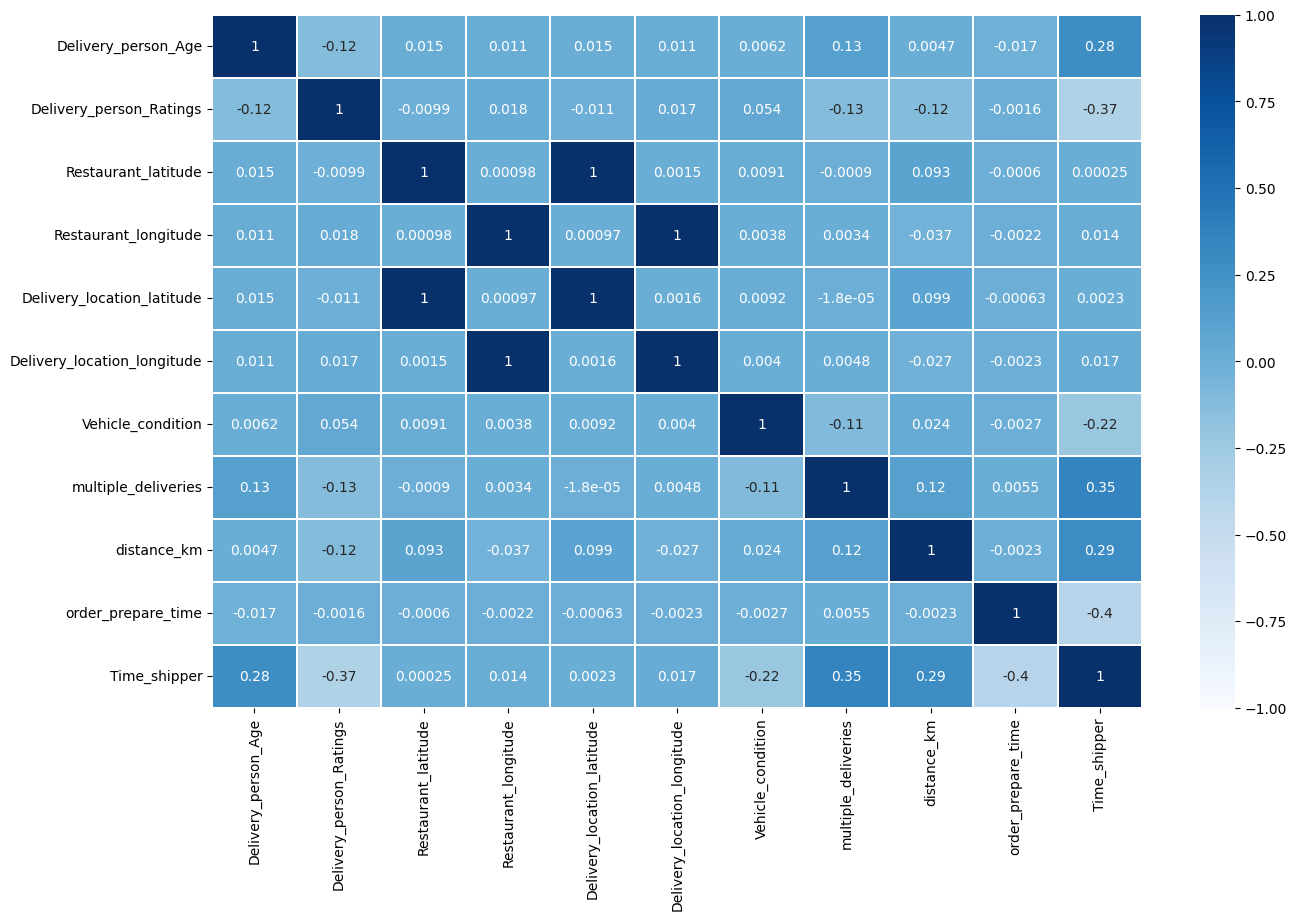

In [45]:
# Correlation HeatMap
plt.figure(figsize=(15,9))
sns.heatmap(df_new.select_dtypes(include=['float64', 'int64']).corr(), annot=True, linewidth=0.1, cmap="Blues", vmin=-1, vmax=1)

plt.show()

In [46]:
df_new.head(1)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0


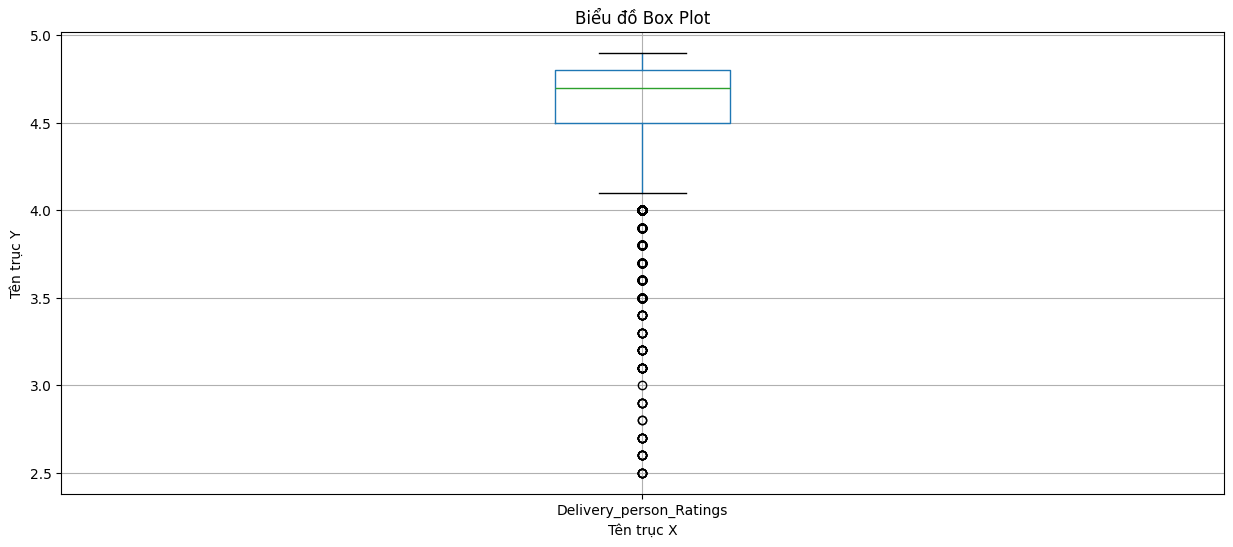

In [47]:
import matplotlib.pyplot as plt

# Chọn các cột dữ liệu bạn muốn vẽ biểu đồ box plot
plt.figure(figsize=(15, 6))
selected_columns = ['Delivery_person_Ratings' ]

# Tạo biểu đồ box plot cho các cột dữ liệu đã chọn
df_new[selected_columns].boxplot()

# Đặt tên cho các trục
plt.xlabel('Tên trục X')
plt.ylabel('Tên trục Y')
plt.title('Biểu đồ Box Plot')

# Hiển thị biểu đồ
plt.show()


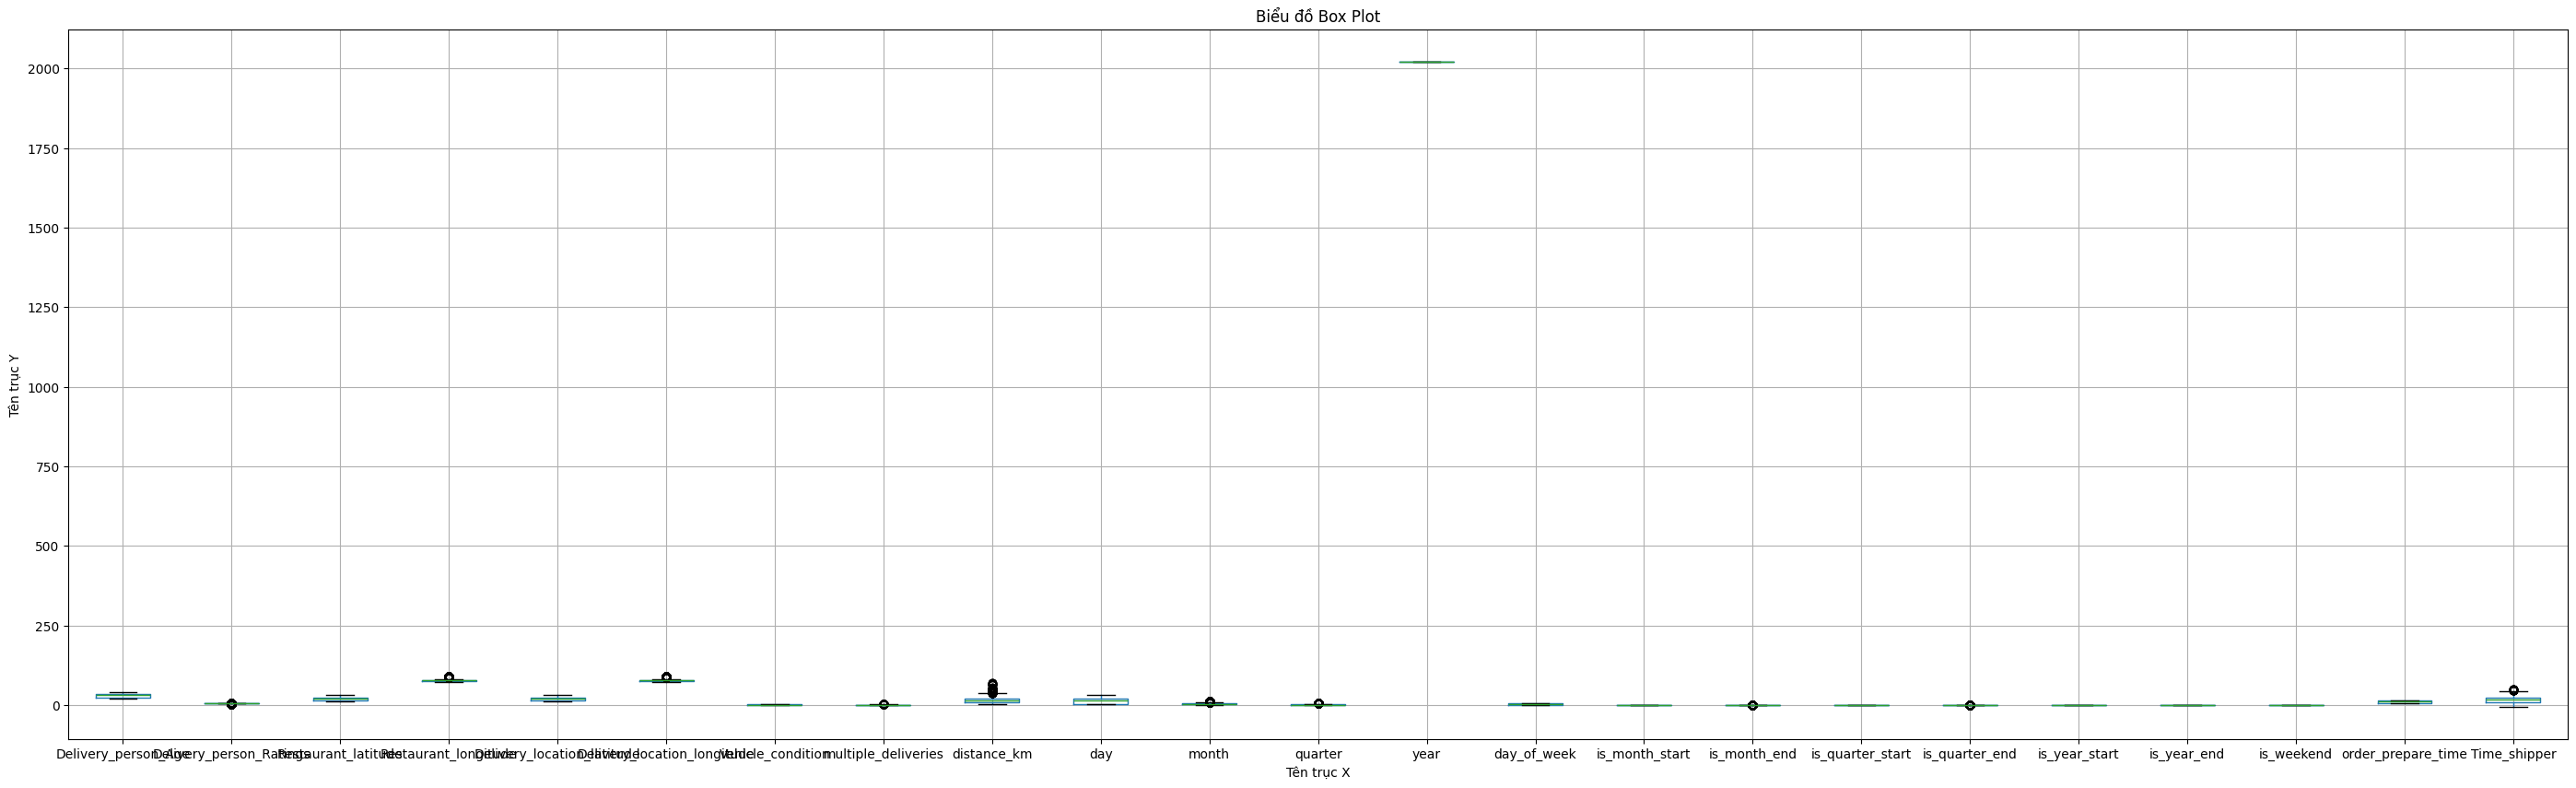

In [48]:
import matplotlib.pyplot as plt

# Tạo biểu đồ box plot cho tất cả các cột dữ liệu trong DataFrame df_new
plt.figure(figsize=(35, 10))
df_new.boxplot()

# Đặt tên cho các trục
plt.xlabel('Tên trục X')
plt.ylabel('Tên trục Y')
plt.title('Biểu đồ Box Plot')

# Hiển thị biểu đồ
plt.show()


## Xử lý giá trị ngoại lai

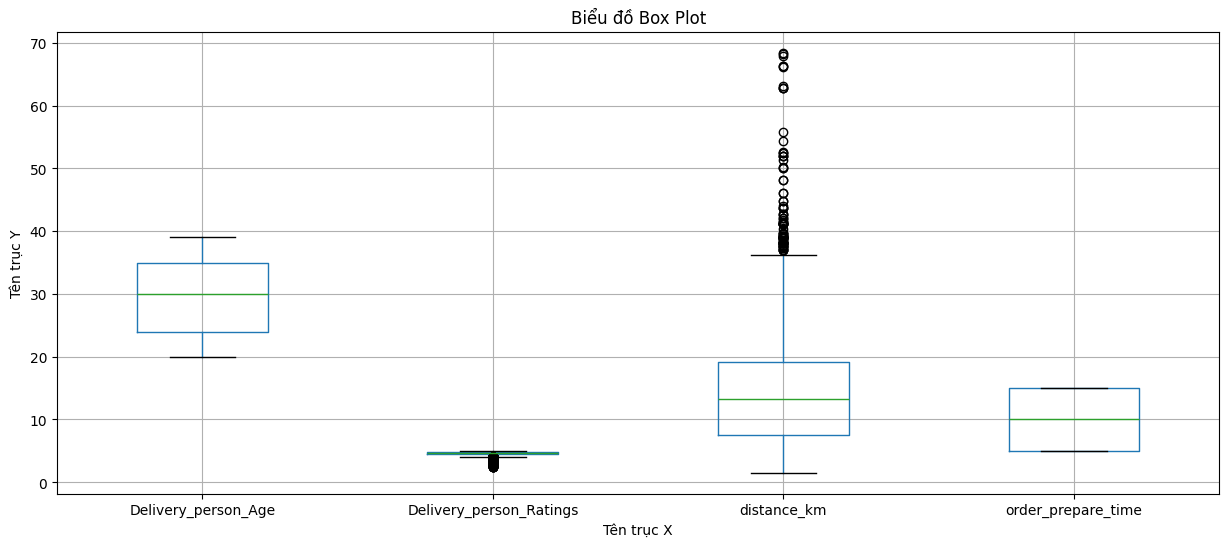

In [49]:
import matplotlib.pyplot as plt

# Chọn các cột dữ liệu bạn muốn vẽ biểu đồ box plot
plt.figure(figsize=(15, 6))
selected_columns = ['Delivery_person_Age'	,'Delivery_person_Ratings',	'distance_km' , 'order_prepare_time' ]

# Tạo biểu đồ box plot cho các cột dữ liệu đã chọn
df_new[selected_columns].boxplot()

# Đặt tên cho các trục
plt.xlabel('Tên trục X')
plt.ylabel('Tên trục Y')
plt.title('Biểu đồ Box Plot')

# Hiển thị biểu đồ
plt.show()


### Age

In [50]:
# def replace_outliers_with_median(df, column_name):
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     median_value = df[column_name].median()
#     df[column_name] = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound), median_value, df[column_name])
#     return df

# # Thay thế giá trị ngoại lai cho cột `Delivery_person_Age`
# df_new = replace_outliers_with_median(df_new, 'Delivery_person_Age')


### Rating

In [51]:
#C1 
#winsorize là hàm dùng để hạn chế các giá trị ngoại lai bằng cách thay thế các giá trị cực đoan ở hai đầu phân phối
# với các giá trị gần nhất nằm trong một ngưỡng cụ thể. Ngưỡng này được xác định bởi tham số limits
#Tham số limits=[0.05, 0.05] có nghĩa là 5% các giá trị lớn nhất và 5% các giá trị nhỏ nhất sẽ được thay thế bằng các giá trị tại ngưỡng 5% và 95% tương ứng.
from scipy.stats.mstats import winsorize

def winsorize_column(df, column_name, limits):
    df[column_name] = winsorize(df[column_name], limits=limits)
    return df

# Winsorize giá trị ngoại lai cho cột `Delivery_person_Ratings`
df_new = winsorize_column(df_new, 'Delivery_person_Ratings', limits=[0.05, 0.05])


In [52]:
# #C2 trả về kq thấp hơn C1
# from sklearn.ensemble import IsolationForest

# def isolation_forest_outlier_removal(df, column_name):
#     iso_forest = IsolationForest(contamination=0.05)
#     df['scores'] = iso_forest.fit_predict(df[[column_name]])
#     df = df[df['scores'] == 1]
#     df.drop(columns=['scores'], inplace=True)
#     return df

# # Sử dụng Isolation Forest để xử lý giá trị ngoại lai cho cột `Delivery_person_Ratings`
# df_new = isolation_forest_outlier_removal(df_new, 'Delivery_person_Ratings')

# # Kiểm tra lại dữ liệu
# print(df_new.describe())



### Distance

In [53]:
# def z_score_outlier_removal(df, column_name, threshold=3):
#     mean = df[column_name].mean()
#     std = df[column_name].std()
#     df = df[(np.abs(df[column_name] - mean) / std) < threshold]
#     return df

# # Loại bỏ giá trị ngoại lai bằng Z-score cho cột `distance_km`
# df_new = z_score_outlier_removal(df_new, 'distance_km')


In [54]:
# from sklearn.neighbors import LocalOutlierFactor

# def lof_outlier_removal(df, column_name):
#     lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
#     df['scores'] = lof.fit_predict(df[[column_name]])
#     df = df[df['scores'] == 1]
#     df.drop(columns=['scores'], inplace=True)
#     return df

# # Sử dụng LOF để xử lý giá trị ngoại lai cho cột `distance_km`
# df_new = lof_outlier_removal(df_new, 'distance_km')

# # Kiểm tra lại dữ liệu
# print(df_new.describe())


In [55]:
# from sklearn.covariance import EllipticEnvelope

# def elliptic_envelope_outlier_removal(df, column_name):
#     envelope = EllipticEnvelope(contamination=0.05)
#     df['scores'] = envelope.fit_predict(df[[column_name]])
#     df = df[df['scores'] == 1]
#     df.drop(columns=['scores'], inplace=True)
#     return df

# # Sử dụng Elliptic Envelope để xử lý giá trị ngoại lai cho cột `distance_km`
# df_new = elliptic_envelope_outlier_removal(df_new, 'distance_km')

# # Kiểm tra lại dữ liệu
# print(df_new.describe())


- Đã thử 3 cách xử lý distance nhưng kq đánh giá đều trả về kq xấu hơn, do đó sẽ k xử lý giá trị ngoại lai của distance nữa

### Xóa ngoại lai Rating 1 lần nữa

In [56]:
def replace_outliers_with_nearest(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])
    return df

# Thay thế giá trị ngoại lai bằng giá trị gần nhất cho cột `Delivery_person_Ratings`
df_new = replace_outliers_with_nearest(df_new, 'Delivery_person_Ratings')


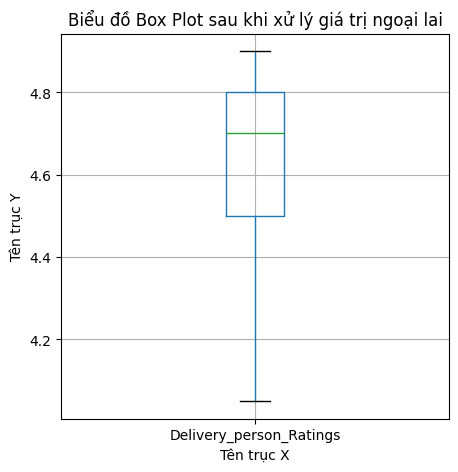

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
df_new.boxplot(column=['Delivery_person_Ratings'])
plt.title('Biểu đồ Box Plot sau khi xử lý giá trị ngoại lai')
plt.xlabel('Tên trục X')
plt.ylabel('Tên trục Y')
plt.show()


### Mã hóa DL

### Road_traffic_density, Weather_conditions, Road_traffic_density, Festival - Ordinal

In [58]:
from sklearn.preprocessing import OrdinalEncoder

# Xóa dấu cách sau mỗi danh mục trong danh sách
categories = [['Low', 'Medium', 'Jam', 'High']]

# Khởi tạo và fit OrdinalEncoder
oe = OrdinalEncoder(categories=categories)
encoded_labels = oe.fit_transform(df_new[['Road_traffic_density']])

# Ghi đè trực tiếp cột Road_traffic_density trong DataFrame df_new
df_new['Road_traffic_density'] = encoded_labels.flatten()
df_new['Road_traffic_density'] = df_new['Road_traffic_density'].astype(int)

df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,3,2,Snack,motorcycle,0.0,No,Urban,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,0,0,Drinks,motorcycle,1.0,No,Urban,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,1,0,Buffet,motorcycle,1.0,No,Metropolitian,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,3,1,Snack,scooter,1.0,No,Metropolitian,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Cloudy,2,0,Buffet,motorcycle,1.0,No,Urban,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0


In [59]:

categories = [['Sunny', 'Cloudy', 'Stormy', 'Fog', 'Windy', 'Sandstorms']]

oe = OrdinalEncoder(categories=categories)
encoded_labels = oe.fit_transform(df_new[['Weather_conditions']])

df_new['Weather_conditions'] = encoded_labels.flatten()
df_new['Weather_conditions'] = df_new['Weather_conditions'].astype(int)

df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,Snack,motorcycle,0.0,No,Urban,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,Drinks,motorcycle,1.0,No,Urban,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,Buffet,motorcycle,1.0,No,Metropolitian,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,Snack,scooter,1.0,No,Metropolitian,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,Buffet,motorcycle,1.0,No,Urban,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0


In [60]:

categories = [['Metropolitian', 'Urban', 'Semi-Urban', ]]

# Khởi tạo và fit OrdinalEncoder
oe = OrdinalEncoder(categories=categories)
encoded_labels = oe.fit_transform(df_new[['City']])

# Ghi đè trực tiếp cột Road_traffic_density trong DataFrame df_new
df_new['City'] = encoded_labels.flatten()
df_new['City'] = df_new['City'].astype(int)

df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,Snack,motorcycle,0.0,No,1,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,Drinks,motorcycle,1.0,No,1,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,Buffet,motorcycle,1.0,No,0,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,Snack,scooter,1.0,No,0,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,Buffet,motorcycle,1.0,No,1,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0


In [61]:

categories = [['No', 'Yes']]

# Khởi tạo và fit OrdinalEncoder
oe = OrdinalEncoder(categories=categories)
encoded_labels = oe.fit_transform(df_new[['Festival']])

# Ghi đè trực tiếp cột Road_traffic_density trong DataFrame df_new
df_new['Festival'] = encoded_labels.flatten()
df_new['Festival'] = df_new['Festival'].astype(int)

df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,Snack,motorcycle,0.0,0,1,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,Drinks,motorcycle,1.0,0,1,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,Buffet,motorcycle,1.0,0,0,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,Snack,scooter,1.0,0,0,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,Buffet,motorcycle,1.0,0,1,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0


In [62]:
# Xóa các dòng có 'Type_of_vehicle' là 'bicycle' trong DataFrame gốc
df_new.drop(df_new[df_new['Type_of_vehicle'] == 'bicycle'].index, inplace=True)

In [63]:
unique_values = df_new['Type_of_vehicle'].unique()
print(unique_values)

['motorcycle' 'scooter' 'electric_scooter']


In [64]:
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,Snack,motorcycle,0.0,0,1,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,Drinks,motorcycle,1.0,0,1,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,Buffet,motorcycle,1.0,0,0,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,Snack,scooter,1.0,0,0,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,Buffet,motorcycle,1.0,0,1,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0


In [65]:
# Kiểm tra tên của tất cả các cột trong DataFrame
print(df_new.columns)


Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'distance_km', 'day', 'month', 'quarter', 'year', 'day_of_week',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'is_weekend', 'order_prepare_time',
       'Time_shipper'],
      dtype='object')


### Type_of_vehicle, Type_of_order - One hot

In [66]:
# Sử dụng pandas để thực hiện One-Hot Encoding
df_encoded = pd.get_dummies(df_new, columns=['Type_of_vehicle'])
df_new = df_encoded 

# Chuyển các giá trị True thành 1 và False thành 0
df_new.replace({True: 1, False: 0}, inplace=True)
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,Snack,0.0,0,1,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0,0,1,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,Drinks,1.0,0,1,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0,0,1,0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,Buffet,1.0,0,0,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0,0,1,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,Snack,1.0,0,0,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0,0,0,1
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,Buffet,1.0,0,1,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0,0,1,0


In [67]:
# Sử dụng pandas để thực hiện One-Hot Encoding
df_encoded = pd.get_dummies(df_new, columns=['Type_of_order'])
df_new = df_encoded 

# Chuyển các giá trị True thành 1 và False thành 0
df_new.replace({True: 1, False: 0}, inplace=True)
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,0.0,0,1,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0,0,1,0,0,0,0,1
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,1.0,0,1,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0,0,1,0,0,1,0,0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,1.0,0,0,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0,0,1,0,1,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,1.0,0,0,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0,0,0,1,0,0,0,1
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,1.0,0,1,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0,0,1,0,1,0,0,0


In [68]:
# from sklearn.preprocessing import LabelEncoder

# def label_encoding(df):
#     label_encoder = LabelEncoder()
#     df['City_code'] = label_encoder.fit_transform(df['City_code'])

# label_encoding(df_new)
# df_new


In [69]:
# df_new.to_csv('TXL DO AN_12300.csv', index=False)

### Mô hình

In [70]:


# X = df_new.drop(['Time_taken(min)'], axis=1)  # Features
# y = df_new['Time_taken(min)']  # dự đoán

# X = df_new.drop(['Time_shipper', 'Restaurant_latitude',	'Restaurant_longitude',	'Delivery_location_latitude',	'Delivery_location_longitude'
# ], axis=1)  # Features
X = df_new.drop(['Time_shipper', ], axis=1)  # Features

y = df_new['Time_shipper']  # dự đoán
# Lấy tên các cột đặc trưng
feature_names = X.columns.tolist()
#feature_names = df_new.drop(['Time_shipper'], axis=1).columns.tolist()

print(feature_names)




['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival', 'City', 'distance_km', 'day', 'month', 'quarter', 'year', 'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend', 'order_prepare_time', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter', 'Type_of_order_Buffet', 'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack']


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7856, 33)
(7856,)
(1965, 33)
(1965,)


In [72]:
# Kiểm tra các cột không phải là số
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index([], dtype='object')


In [73]:
# # Danh sách các cột cần xóa . K cần xóa cx đc vì k ảnh hưởng, hơn nữa lát còn dùng tọa độ
# columns_to_drop = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
#                    'is_month_start',	'is_month_end',	'is_quarter_start',	'is_quarter_end',	'is_year_start'	,'is_year_end'	
#                    ]

# # Xóa các cột khỏi DataFrame df_new
# df_new.drop(columns_to_drop, axis=1, inplace=True)


## Scaler

In [74]:

# Tạo một đối tượng có bộ chia tỷ lệ tiêu chuẩn
scaler = StandardScaler()

#Phù hợp với bộ chia tỷ lệ trên dữ liệu đào tạo
scaler.fit(X_train)

# Chuẩn hóa bộ dữ liệu train
X_train = scaler.transform(X_train)

# Chuẩn hóa trên bộ dữ liệu test
X_test = scaler.transform(X_test)

df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,0.0,0,1,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0,0,1,0,0,0,0,1
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,1.0,0,1,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0,0,1,0,0,1,0,0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,1.0,0,0,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0,0,1,0,1,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,1.0,0,0,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0,0,0,1,0,0,0,1
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,1.0,0,1,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0,0,1,0,1,0,0,0


In [75]:
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,0.0,0,1,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0,0,1,0,0,0,0,1
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,1.0,0,1,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0,0,1,0,0,1,0,0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,1.0,0,0,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0,0,1,0,1,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,1.0,0,0,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0,0,0,1,0,0,0,1
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,1.0,0,1,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0,0,1,0,1,0,0,0


## Tìm mô hình tốt nhất

In [95]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Dự đoán trên tập huấn luyện
    y_pred_train = model.predict(X_train)
    # Dự đoán trên tập kiểm tra
    y_pred_test = model.predict(X_test)

    # Đánh giá trên tập huấn luyện
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Đánh giá trên tập kiểm tra
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'Training MAE: {mae_train}, Test MAE: {mae_test}')
    print(f'Training MSE: {mse_train}, Test MSE: {mse_test}')
    print(f'Training RMSE: {rmse_train}, Test RMSE: {rmse_test}')
    print(f'Training R²: {r2_train}, Test R²: {r2_test}')

# Giả sử bạn đã có X_train, y_train, X_test, y_test
# Định nghĩa các tham số cần tìm kiếm cho từng mô hình
param_grid_lr = [{}]  # Không có tham số nào cần tìm kiếm cho LinearRegression
param_grid_dt = {
    'max_depth': [3, 5, 7, 9, 11], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Khởi tạo các mô hình
models = [
    (LinearRegression(), param_grid_lr),
    (DecisionTreeRegressor(), param_grid_dt),
    (RandomForestRegressor(), param_grid_rf),
    (xgb.XGBRegressor(), param_grid_xgb),
]

# Duyệt qua từng mô hình và thực hiện GridSearchCV
for model, param_grid in models:
    print(f"Đang thực hiện GridSearchCV cho {model.__class__.__name__}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Lấy mô hình tốt nhất từ GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Đánh giá mô hình tốt nhất
    print(f"Kết quả cho mô hình {model.__class__.__name__}:")
    evaluate_model(best_model, X_train, y_train, X_test, y_test)
    print("\n" + "="*60 + "\n")


Đang thực hiện GridSearchCV cho LinearRegression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Kết quả cho mô hình LinearRegression:
Training MAE: 5.059156871647405, Test MAE: 5.0562431536303585
Training MSE: 40.71075539968804, Test MSE: 40.19829137682215
Training RMSE: 6.380498052635707, Test RMSE: 6.34021225013975
Training R²: 0.6130544335293269, Test R²: 0.6301155227007254


Đang thực hiện GridSearchCV cho DecisionTreeRegressor
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Kết quả cho mô hình DecisionTreeRegressor:
Training MAE: 3.698351894125548, Test MAE: 4.177834737790631
Training MSE: 22.882363626709886, Test MSE: 29.128942645383102
Training RMSE: 4.783551361353809, Test RMSE: 5.397123552910671
Training R²: 0.7825088464019748, Test R²: 0.731970107294649


Đang thực hiện GridSearchCV cho RandomForestRegressor
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Kết quả cho mô hình RandomForestRegressor:
Training MAE: 2.1479823198156187, Tes

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Tìm mô hình tốt nhất
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},  
    {
        'max_depth': [3, 5, 7, 9, 11], 
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    {
        'n_estimators': [100, 200, 300], # Số lượng cây trong rừng ngẫu nhiên. Giá trị lớn hơn thường cải thiện độ chính xác nhưng cũng làm tăng thời gian tính toán.
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()


LinearRegression:
Best parameters: {}
Best R2 score: 0.593045781283837

DecisionTreeRegressor:
Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best R2 score: 0.716465761254543



### modal

In [82]:

#thử vs XGB
model = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0)

model.fit(X_train, y_train,
         eval_set = [(X_train, y_train), (X_test, y_test)], verbose = True)

[0]	validation_0-rmse:9.57357	validation_1-rmse:9.74527
[1]	validation_0-rmse:8.95860	validation_1-rmse:9.13569
[2]	validation_0-rmse:8.44297	validation_1-rmse:8.63353
[3]	validation_0-rmse:7.99318	validation_1-rmse:8.19818
[4]	validation_0-rmse:7.60739	validation_1-rmse:7.80635
[5]	validation_0-rmse:7.28427	validation_1-rmse:7.51310
[6]	validation_0-rmse:6.96990	validation_1-rmse:7.21149
[7]	validation_0-rmse:6.62793	validation_1-rmse:6.87577
[8]	validation_0-rmse:6.40573	validation_1-rmse:6.67108
[9]	validation_0-rmse:6.16803	validation_1-rmse:6.43314
[10]	validation_0-rmse:5.92347	validation_1-rmse:6.19764
[11]	validation_0-rmse:5.72983	validation_1-rmse:6.00842
[12]	validation_0-rmse:5.57294	validation_1-rmse:5.85968
[13]	validation_0-rmse:5.40118	validation_1-rmse:5.70335
[14]	validation_0-rmse:5.29212	validation_1-rmse:5.60375
[15]	validation_0-rmse:5.17012	validation_1-rmse:5.49410
[16]	validation_0-rmse:5.04447	validation_1-rmse:5.38101
[17]	validation_0-rmse:4.94928	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Đánh giá độ đo XGB

In [83]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae_xgb,2))
print("Mean Squared Error (MSE):", round(mse_xgb,2))
print("Root Mean Squared Error (RMSE):", round(rmse_xgb,2))
print("R-squared (R2) Score:", round(r2_xgb,2))

Mean Absolute Error (MAE): 3.44
Mean Squared Error (MSE): 18.86
Root Mean Squared Error (RMSE): 4.34
R-squared (R2) Score: 0.83


### Tầm quan trọng của đặc trưng

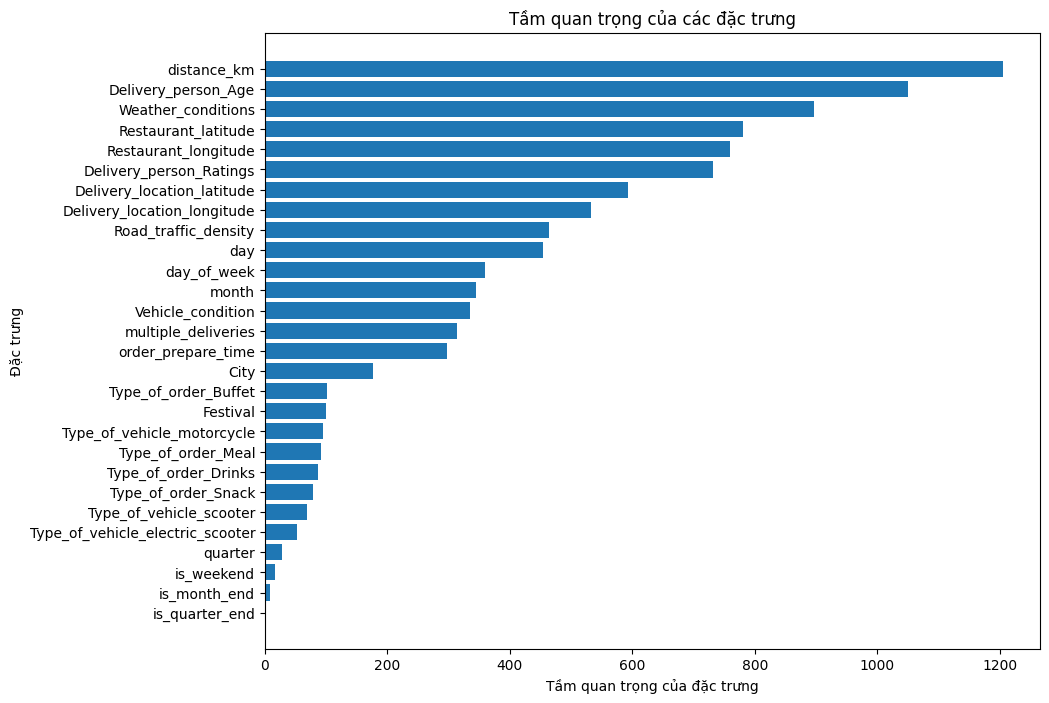

In [84]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Sử dụng từ điển để ánh xạ tên cột với các nhãn
feature_importances = model.get_booster().get_score(importance_type='weight')
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Tạo biểu đồ tầm quan trọng của đặc trưng
plt.figure(figsize=(10, 8))
plt.barh([feature_names[int(key[1:])] for key, _ in sorted_importances], [value for _, value in sorted_importances])
plt.xlabel('Tầm quan trọng của đặc trưng')
plt.ylabel('Đặc trưng')
plt.title('Tầm quan trọng của các đặc trưng')
plt.gca().invert_yaxis()
plt.show()



### Lưu mô hình sau khi huấn luyện


In [85]:
model.save_model('xgb_model.json')
# Tải lại mô hình đã lưu (khi cần sử dụng lại mô hình)
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('xgb_model.json')


### So sánh giá trị dự đoán-thực tế

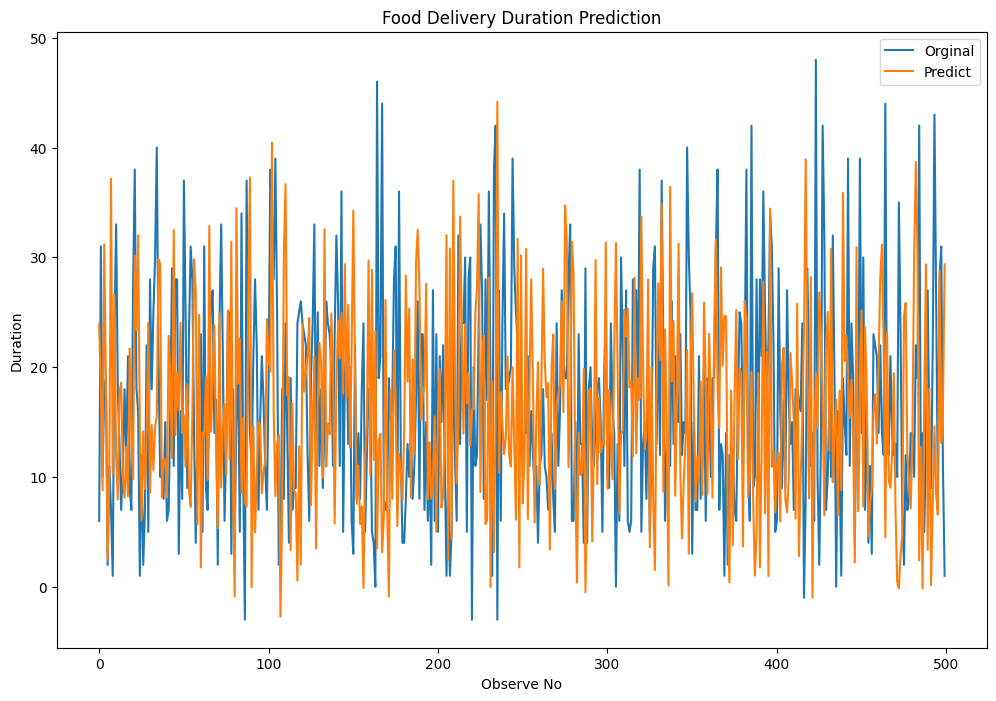

In [86]:


plt.figure(figsize=(12,8))
plt.plot(range(len(y_train[:500])),y_train[:500],label="Orginal")
plt.plot(range(len(y_train[:500])),y_pred[:500],label="Predict")
plt.title("Food Delivery Duration Prediction")
plt.ylabel("Duration")
plt.xlabel("Observe No")
plt.legend()
plt.show()

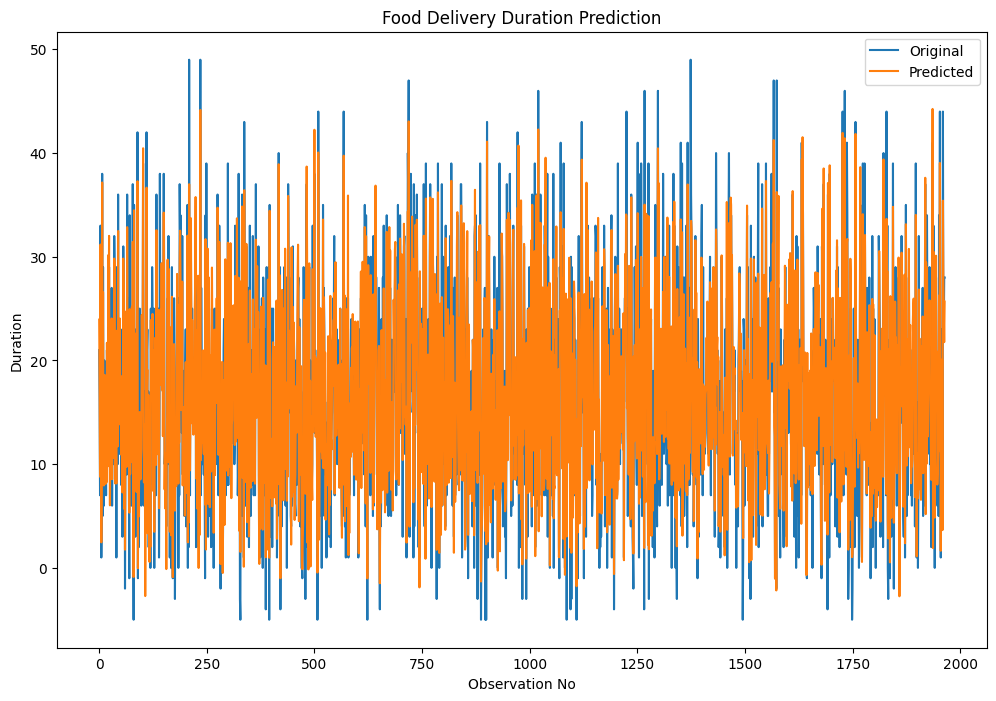

In [87]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(12, 8))
plt.plot(range(len(y_test)), y_test, label="Original")
plt.plot(range(len(y_pred)), y_pred, label="Predicted")
plt.title("Food Delivery Duration Prediction")
plt.ylabel("Duration")
plt.xlabel("Observation No")
plt.legend()
plt.show()


In [88]:

comparison_df = pd.DataFrame({'Test': y_test, 'Predict': y_pred})

print(comparison_df)


       Test    Predict
7836   21.0  23.940762
4271   16.0  17.951479
740     7.0   8.785126
10820  33.0  31.178095
402    15.0  18.017048
...     ...        ...
518    44.0  35.405937
9739   24.0  27.913439
3760   22.0  24.857235
1200   28.0  21.768400
797    28.0  25.676903

[1965 rows x 2 columns]


In [89]:
df_new.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,distance_km,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,Time_shipper,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,3,2,0.0,0,1,5.1959,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,9.0,0,1,0,0,0,0,1
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,0,0,1.0,0,1,5.1475,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,11.0,0,1,0,0,1,0,0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1,0,1.0,0,0,13.1790,4,5,2,2022,2,0,0,0,0,0,0,0,10.0,11.0,0,1,0,1,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,3,1,1.0,0,0,10.5799,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,15.0,0,0,1,0,0,0,1
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,1,2,0,1.0,0,1,10.0741,3,11,4,2022,3,0,0,0,0,0,0,0,10.0,16.0,0,1,0,1,0,0,0


### Dự đoán vs bộ DL mới

In [90]:
import tkinter as tk
from tkinter import messagebox
import webbrowser
import folium
import os
import json
import requests
import xgboost as xgb
import numpy as np
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Load the trained model
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('xgb_model.json')

def y_pred(input_data):
    input_array = np.array(list(input_data.values())).reshape(1, -1)
    predicted_time = loaded_model.predict(input_array)
    return predicted_time[0]

form = tk.Tk()
form.title("Dự đoán thời gian giao hàng")
form.geometry('1200x700')

label_title = tk.Label(form, text="Nhập thông tin đơn hàng:", font=("Arial Bold", 10), fg="red")
label_title.grid(row=0, column=0, padx=40, pady=10, columnspan=6)

label_texts = {
    "Tuổi của người giao hàng:": "Delivery_person_Age",
    "Đánh giá của người giao hàng:": "Delivery_person_Ratings",
    "Vĩ độ nhà hàng:": "Restaurant_latitude",
    "Kinh độ nhà hàng:": "Restaurant_longitude",
    "Vĩ độ điểm giao hàng:": "Delivery_location_latitude",
    "Kinh độ điểm giao hàng:": "Delivery_location_longitude",
    "Điều kiện thời tiết:": "Weather_conditions",
    "Mật độ giao thông:": "Road_traffic_density",
    "Tình trạng phương tiện (xe chở đc mấy ng):": "Vehicle_condition",
    "Số lượng đơn hàng được giao trong một chuyến:": "multiple_deliveries",
    "Có phải dịp lễ không:": "Festival",
    "Thành phố:": "City",
    "Khoảng cách:": "distance_km",
    "Ngày (dd/mm/yyyy):": "Order_Date",
    "Thời gian chuẩn bị đơn hàng:": "order_prepare_time",
    "Phương tiện:": "Type_of_vehicle",
    "Loại đơn hàng:": "Type_of_order",
}

entry_boxes = {}
num_columns = 3
for i, (label_text, var_name) in enumerate(label_texts.items()):
    row = i // num_columns + 1
    column = (i % num_columns) * 2
    
    label = tk.Label(form, text=label_text)
    label.grid(row=row, column=column, padx=10, pady=10, sticky=tk.E)
    
    if var_name == "distance_km":
        entry_box = tk.Entry(form, state='readonly', fg='blue')
    else:
        entry_box = tk.Entry(form)
        
    entry_box.grid(row=row, column=column + 1, padx=10, pady=10, sticky=tk.W)
    entry_boxes[var_name] = entry_box

label_result = tk.Label(form, text="Dự đoán thời gian giao hàng:", font=("Arial Bold", 12), fg="blue")
label_result.grid(row=(len(label_texts) // num_columns) + 2, column=0, columnspan=6, pady=20)

def calculate_distance(res_lat, res_lon, del_lat, del_lon):
    try:
        url = f"http://router.project-osrm.org/route/v1/driving/{res_lon},{res_lat};{del_lon},{del_lat}?overview=false"
        response = requests.get(url)
        data = response.json()
        distance = data['routes'][0]['distance'] / 1000  # Convert to kilometers

        entry_boxes["distance_km"].config(state='normal')
        entry_boxes["distance_km"].delete(0, tk.END)
        entry_boxes["distance_km"].insert(0, f"{distance:.3f}")
        entry_boxes["distance_km"].config(state='readonly')

        return distance
    except Exception as e:
        messagebox.showerror("Lỗi", f"Đã xảy ra lỗi khi tính khoảng cách: {str(e)}")
        return None

def calculate_and_update_distance():
    try:
        res_lat = float(entry_boxes["Restaurant_latitude"].get())
        res_lon = float(entry_boxes["Restaurant_longitude"].get())
        del_lat = float(entry_boxes["Delivery_location_latitude"].get())
        del_lon = float(entry_boxes["Delivery_location_longitude"].get())
        calculate_distance(res_lat, res_lon, del_lat, del_lon)
    except ValueError:
        messagebox.showerror("Lỗi", "Vui lòng nhập giá trị hợp lệ cho vĩ độ và kinh độ.")

def extract_date_features(order_date):
    date_features = {}
    date_features["day"] = order_date.day
    date_features["month"] = order_date.month
    date_features["quarter"] = (order_date.month - 1) // 3 + 1
    date_features["year"] = order_date.year
    date_features['day_of_week'] = order_date.weekday()
    date_features["is_month_start"] = 1 if order_date.day == 1 else 0
    date_features["is_month_end"] = 1 if order_date.day == (pd.Period(order_date.strftime('%Y-%m-%d')).days_in_month) else 0
    date_features["is_quarter_start"] = 1 if order_date.month in [1, 4, 7, 10] and order_date.day == 1 else 0
    date_features["is_quarter_end"] = 1 if order_date.month in [3, 6, 9, 12] and order_date.day == (pd.Period(order_date.strftime('%Y-%m-%d')).days_in_month) else 0
    date_features["is_year_start"] = 1 if order_date.month == 1 and order_date.day == 1 else 0
    date_features["is_year_end"] = 1 if order_date.month == 12 and order_date.day == 31 else 0
    date_features['is_weekend'] = 1 if order_date.weekday() >= 5 else 0
    return date_features

def encode_vehicle_type(vehicle_type):
    vehicle_types = ["electric_scooter", "motorcycle", "scooter"]
    encoded_features = {f"Type_of_vehicle_{vt}": 0 for vt in vehicle_types}
    if vehicle_type in vehicle_types:
        encoded_features[f"Type_of_vehicle_{vehicle_type}"] = 1
    return encoded_features

def encode_order_type(order_type):
    order_types = ["Buffet", "Drinks", "Meal", "Snack"]
    encoded_features = {f"Type_of_order_{ot}": 0 for ot in order_types}
    if order_type in order_types:
        encoded_features[f"Type_of_order_{order_type}"] = 1
    return encoded_features

weather_conditions_categories = [['Sunny', 'Cloudy', 'Stormy', 'Fog', 'Windy', 'Sandstorms']]
road_traffic_density_categories = [['Low', 'Medium', 'Jam', 'High']]
festival_categories = [['No', 'Yes']]
city_categories = [['Metropolitian', 'Urban', 'Semi-Urban']]

oe_weather = OrdinalEncoder(categories=weather_conditions_categories)
oe_traffic = OrdinalEncoder(categories=road_traffic_density_categories)
oe_festival = OrdinalEncoder(categories=festival_categories)
oe_city = OrdinalEncoder(categories=city_categories)

oe_weather.fit([['Sunny'], ['Cloudy'], ['Stormy'], ['Fog'], ['Windy'], ['Sandstorms']])
oe_traffic.fit([['Low'], ['Medium'], ['Jam'], ['High']])
oe_festival.fit([['No'], ['Yes']])
oe_city.fit([['Metropolitian'], ['Urban'], ['Semi-Urban']])

def predict_delivery_time():
    try:
        input_data = {}
        
        for var_name, entry_box in entry_boxes.items():
            if var_name == "Order_Date":
                order_date = datetime.strptime(entry_box.get(), "%d/%m/%Y")
                date_features = extract_date_features(order_date)
                input_data.update(date_features)
            elif var_name == "Type_of_vehicle":
                vehicle_type = entry_box.get()
                vehicle_features = encode_vehicle_type(vehicle_type)
                input_data.update(vehicle_features)
            elif var_name == "Type_of_order":
                order_type = entry_box.get()
                order_features = encode_order_type(order_type)
                input_data.update(order_features)
            elif var_name in ["Delivery_person_Age", "Delivery_person_Ratings", "Vehicle_condition", "multiple_deliveries", "order_prepare_time"]:
                input_data[var_name] = float(entry_box.get())
            elif var_name == "Weather_conditions":
                input_data[var_name] = oe_weather.transform([[entry_box.get()]])[0, 0]
            elif var_name == "Road_traffic_density":
                input_data[var_name] = oe_traffic.transform([[entry_box.get()]])[0, 0]
            elif var_name == "Festival":
                input_data[var_name] = oe_festival.transform([[entry_box.get()]])[0, 0]
            elif var_name == "City":
                input_data[var_name] = oe_city.transform([[entry_box.get()]])[0, 0]
            elif var_name in ["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"]:
                input_data[var_name] = float(entry_box.get())
            else:
                input_data[var_name] = entry_box.get()
        
        # Calculate distance
        res_lat = float(entry_boxes["Restaurant_latitude"].get())
        res_lon = float(entry_boxes["Restaurant_longitude"].get())
        del_lat = float(entry_boxes["Delivery_location_latitude"].get())
        del_lon = float(entry_boxes["Delivery_location_longitude"].get())
        
        distance = calculate_distance(res_lat, res_lon, del_lat, del_lon)
        if distance is not None:
            input_data["distance_km"] = distance
        
        # Ensure the input data contains all required features
        # Adding placeholder values for missing features if necessary
        expected_features = [
            "Delivery_person_Age", "Delivery_person_Ratings", "Restaurant_latitude", 
            "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude", 
            "Weather_conditions", "Road_traffic_density", "Vehicle_condition", 
            "multiple_deliveries", "Festival", "City", "distance_km", "day", "month", 
            "quarter", "year", "day_of_week", "is_month_start", "is_month_end", 
            "is_quarter_start", "is_quarter_end", "is_year_start", "is_year_end", 
            "is_weekend", "Type_of_vehicle_motorcycle", "Type_of_vehicle_scooter", 
            "Type_of_vehicle_electric_scooter", "Type_of_order_Buffet", "Type_of_order_Drinks", 
            "Type_of_order_Meal", "Type_of_order_Snack", "order_prepare_time"
        ]
        
        for feature in expected_features:
            if feature not in input_data:
                input_data[feature] = 0  # or any appropriate default value
        
        # Convert input data to array
        input_array = np.array([input_data[feature] for feature in expected_features]).reshape(1, -1)
        
        # Debugging information
        print(f"Input array shape: {input_array.shape}")
        print(f"Input data features: {list(input_data.keys())}")

        predicted_time = loaded_model.predict(input_array)
        label_result.config(text=f"Dự đoán thời gian giao hàng: {predicted_time[0]:.2f} phút")
    
    except ValueError as e:
        messagebox.showerror("Lỗi", f"Vui lòng nhập dữ liệu hợp lệ: {str(e)}")
    except Exception as e:
        messagebox.showerror("Lỗi", f"Đã xảy ra lỗi: {str(e)}")

def generate_map_html():
    m = folium.Map(location=[21.028511, 105.804817], zoom_start=12)
    
    m.add_child(folium.LatLngPopup())

    map_html = f"""
    <html>
    <head>
        <script>
            function sendCoordinates(lat, lng) {{
                var url = "http://localhost:8080?lat=" + lat + "&lng=" + lng;
                window.location.href = url;
            }}
        </script>
    </head>
    <body>
        {m._repr_html_()}
    </body>
    </html>
    """

    html_path = os.path.join(os.getcwd(), 'map.html')
    with open(html_path, 'w', encoding='utf-8') as f:
        f.write(map_html)

    return html_path

def open_map():
    html_path = generate_map_html()
    webbrowser.open('file://' + html_path)

def update_coordinates(lat, lon, var_name):
    entry_boxes[var_name].delete(0, tk.END)
    entry_boxes[var_name].insert(0, f"{lat:.6f}, {lon:.6f}")

def reset_fields():
    for entry_box in entry_boxes.values():
        entry_box.config(state='normal')
        entry_box.delete(0, tk.END)
    label_result.config(text="Dự đoán thời gian giao hàng:")

btn_open_map = tk.Button(form, text="Chọn vị trí trên bản đồ", command=open_map)
btn_open_map.grid(row=(len(label_texts) // num_columns) + 3, column=0, columnspan=2, pady=10)

btn_calculate_distance = tk.Button(form, text="Tính khoảng cách", command=calculate_and_update_distance)
btn_calculate_distance.grid(row=(len(label_texts) // num_columns) + 3, column=2, columnspan=2, pady=10)

btn_predict = tk.Button(form, text="Dự đoán thời gian giao hàng", command=predict_delivery_time)
btn_predict.grid(row=(len(label_texts) // num_columns) + 3, column=4, columnspan=2, pady=10)

btn_reset = tk.Button(form, text="Reset", command=reset_fields)
btn_reset.grid(row=(len(label_texts) // num_columns) + 3, column=6, columnspan=2, pady=10)

# Hàm để cập nhật các ô nhập liệu từ URL (nếu có)
def check_url_params():
    url = webbrowser.get().name
    if 'localhost:8080' in url:
        query_string = url.split('?')[1]
        params = dict(qc.split('=') for qc in query_string.split('&'))
        if 'lat' in params and 'lng' in params:
            lat = float(params['lat'])
            lon = float(params['lng'])
            # Bạn cần xác định tọa độ này thuộc về nhà hàng hay điểm giao hàng
            # Ví dụ dưới đây chỉ là một cách giả định
            if not entry_boxes["Restaurant_latitude"].get() and not entry_boxes["Restaurant_longitude"].get():
                update_coordinates(lat, lon, "Restaurant_latitude")
                update_coordinates(lat, lon, "Restaurant_longitude")
            else:
                update_coordinates(lat, lon, "Delivery_location_latitude")
                update_coordinates(lat, lon, "Delivery_location_longitude")

# Kiểm tra URL mỗi giây để cập nhật tọa độ (cách đơn giản)
form.after(1000, check_url_params)

form.mainloop()


Input array shape: (1, 33)
Input data features: ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival', 'City', 'distance_km', 'day', 'month', 'quarter', 'year', 'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend', 'order_prepare_time', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter', 'Type_of_order_Buffet', 'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack']
